<a href="https://colab.research.google.com/github/Nikhil0314/Generate-Financial-Report-Apple/blob/main/Genrative_Financial_Report_of_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Generative Financial Report Of Apple**

**Name : Nikhil Khandelwal**

# **EXECUTIVE SUMMARY**

The project aims to revolutionize the process of generating annual reports through the integration of cutting-edge generative AI technologies—specifically GPT (Generative Pre-trained Transformer) and Langchain. Annual reports play a pivotal role in communicating a company's performance, financial health, and strategic direction to stakeholders. The project to create annual reports using
generative AI technologies, GPT and Langchain, represents a significant leap forward in streamlining report generation processes.

By leveraging the capabilities of advanced AI and blockchain validation, this system promises increased efficiency, accuracy, compliance, and adaptability in producing comprehensive and insightful annual reports, ultimately benefiting stakeholders and enhancing decision-making processes.


The annual report contains key information on a company's financial position that can be used to measure:

• A company's ability to pay its debts as they come due

• Whether a company made a profit or loss in its previous fiscal year

• A company's growth over a number of years

• How much of earnings are retained by a company to grow its operations

• The proportion of operational expenses to revenue generated

The process of generating annual reports using GPT and Langchain is done by loading the input report, splitting it into chunks, embedding the chunks and storing it as vectors, document retrieval and then report generation by summarizing the text.

1. Document Loading: The process of bringing documents (textual or otherwise) into a system for
analysis, processing, or storage. It involves reading and extracting data from files or sources like
databases, websites, or document repositories.
2. Splitting: Dividing a document into smaller, manageable units called chunks. In NLP, this often
refers to breaking down a long text into sentences, paragraphs, or even words, depending on the
analysis required.
4
3. Embedding: Representing words, phrases, sentences, or documents as dense numerical vectors
in a high-dimensional space. Word embeddings like Word2Vec, GloVe, or sentence/document
embeddings like BERT, provide a way to convert text into numerical formats that machine learning
models can understand and process.
4. Vector Store: A repository or database where these numerical representations (vectors) of words,
sentences, or documents are stored. This store allows for efficient retrieval and comparison of
vectors, facilitating similarity searches or clustering.
5. Retrieval: The process of searching for and fetching relevant information from a dataset or
collection. It involves querying a database or index to find documents or information that match
specific criteria or keywords.
6. Summarization: Condensing the content of a document or a set of documents while retaining
key information. There are extractive methods that select and concatenate important sentences and
abstractive methods that generate new sentences to convey the main ideas.

Key Features-

• Efficiency: Automation through AI significantly reduces the time and effort required for
annual report creation, enabling swift generation and delivery within tight deadlines.

• Accuracy and Customization: GPT's language generation capabilities ensure accurate and
coherent content while allowing customization based on company-specific data, trends, and
performance metrics.

• Compliance and Assurance: Langchain's integration ensures compliance with industry
regulations, data privacy standards, and internal governance policies. Its blockchain-based
validation provides an immutable record of report authenticity.

• Adaptability: The system is designed to adapt to dynamic changes in data and reporting
requirements, ensuring the generated reports stay relevant and up-to-date.



This project intends to not only streamline report creation but also elevate the quality, accuracy, and
timeliness of annual reports, providing stakeholders with meticulously crafted, compliant, and
insightful documents that reflect an organization's performance and strategies accurately.

# **Introduction**

An annual report typically includes a variety of sections that offer a comprehensive overview of a
company's performance over the past year. Here are the key components usually found in an annual
report:

• Letter from the CEO/Chairperson

• Financial Highlights

• Management Discussion and Analysis (MD&A)

• Financial Statements

• Corporate Governance

• Business Overview

• Risks and Challenges

• Sustainability and Corporate Social Responsibility (CSR)

• Auditor's Report

• Future Outlook

Each of these sections collectively provides shareholders, investors, and other stakeholders with a
comprehensive understanding of the company's performance and future prospects.
The project involves core AI technologies; GPT (Generative Pre-trained Transformer), the concept
of LangChain and Vertex AI. They refer to powerful language models that use transformer
architectures to generate human-like text based on input prompts. Here's an overview of their
relevance and the text-generation process:

GPT (Generative Pre-trained Transformer)- GPT models, developed by OpenAI, have gained
significant attention due to their ability to understand and generate coherent human-like text.
They're pre-trained on vast amounts of text data from the internet, allowing them to learn the
nuances of language and context.

Text Generation Process:
1. Tokenization: The input text is tokenized, breaking it down into smaller units like words or subwords, which the model can understand.

2. Pre-training: GPT models are pre-trained on a diverse corpus of text, learning the relationships
between words and contextual nuances.

3. Fine-tuning: After pre-training, the model can be fine-tuned on specific tasks or datasets to
enhance its performance for particular applications.

4. Text Generation: When given a prompt or starting text, the model uses its learned patterns to
predict and generate the most probable continuation of the input text.

LangChain- LangChain, though not a specific term commonly used in the field, might refer to a
chain or sequence of language models connected for a specific purpose, such as document
processing, translation, summarization, or more. Text Generation Process (in a chained model
scenario):
1. Input Processing: The initial input text or query goes through the first language model in the
chain.
2. Intermediate Representation: The output from the first model serves as input to the subsequent
model(s) in the chain.
3. Sequential Processing: Each model in the chain adds its understanding, context, or transformation
to the text.
4. Final Output: The final model in the chain generates the desired output, incorporating insights
and context from the entire sequence of models.

**Vertex AI**- It is a machine learning (ML) platform that lets you train and deploy ML models and AI
applications, and customize large language models (LLMs) for use in your AI-powered
applications. Vertex AI combines data engineering, data science, and ML engineering workflows,
enabling your teams to collaborate using a common toolset and scale your applications using the
benefits of Google Cloud. Vertex AI provides several options for model training and deployment:

• AutoML

• Custom training

• Model Garden

• Generative AI


In [ ]:
# Install Vertex AI LLM SDK, langchain and dependencies

! pip install google-cloud-aiplatform langchain==0.0.323 chromadb==0.3.26 pydantic==1.10.8 typing-inspect==0.8.0 typing_extensions==4.5.0 pandas datasets google-api-python-client pypdf faiss-cpu transformers config --upgrade --user


In [ ]:
# # Automatically restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
#Google authentication

from google.colab import auth as google_auth
google_auth.authenticate_user()


In [ ]:
from langchain.schema import HumanMessage, SystemMessage
from langchain.llms import VertexAI
from langchain.embeddings import VertexAIEmbeddings
from langchain.chat_models import ChatVertexAI
from google.cloud import aiplatform
import time
from typing import List


#LangChain
import langchain
from pydantic import BaseModel

print(f"LangChain version: {langchain.__version__}")

#Vertex AI

print(f"Vertex AI SDK version: {aiplatform.__version__}")

LangChain version: 0.0.323
Vertex AI SDK version: 1.36.4


In [ ]:
# Utility functions for Embeddings API with rate limiting
def rate_limit(max_per_minute):
    period = 60 / max_per_minute
    print("Waiting")
    while True:
        before = time.time()
        yield
        after = time.time()
        elapsed = after - before
        sleep_time = max(0, period - elapsed)
        if sleep_time > 0:
            print(".", end="")
            time.sleep(sleep_time)


class CustomVertexAIEmbeddings(VertexAIEmbeddings, BaseModel):
    requests_per_minute: int
    num_instances_per_batch: int

    # Overriding embed_documents method
    def embed_documents(self, texts: List[str]):
        limiter = rate_limit(self.requests_per_minute)
        results = []
        docs = list(texts)

        while docs:
            # Working in batches because the API accepts maximum 5
            # documents per request to get embeddings
            head, docs = (
                docs[: self.num_instances_per_batch],
                docs[self.num_instances_per_batch :],
            )
            chunk = self.client.get_embeddings(head)
            results.extend(chunk)
            next(limiter)

        return [r.values for r in results]

In [ ]:
!pip install google-cloud-aiplatform


In [ ]:
project_id = "temporal-state-405706"
aiplatform.init(project=project_id)


# LLM model
#initial temperature =0.1(to do question answering from 10k files)
llm = VertexAI(
    model_name="text-bison@001",
    max_output_tokens=256,
    temperature=0.1,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

# Chat
chat = ChatVertexAI()

# Embedding
EMBEDDING_QPM = 100
EMBEDDING_NUM_BATCH = 5
embeddings = CustomVertexAIEmbeddings(
    requests_per_minute=EMBEDDING_QPM,
    num_instances_per_batch=EMBEDDING_NUM_BATCH,
)

In [ ]:
import os
from langchain.document_loaders import PyPDFDirectoryLoader

pdf_folder_path = '/content/Files'
loader = PyPDFDirectoryLoader(pdf_folder_path)


documents = loader.load()


In [ ]:
! pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_folder_path):
    documents = ""
    with open(pdf_folder_path, "rb") as file:
        pdf_reader = PdfReader(file)
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            documents += page.extract_text()
    return documents

# Split
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 0
)

splits = text_splitter.split_documents(documents)

len(splits)

554

In [ ]:
# split the documents into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=0)
docs = text_splitter.split_documents(documents)
print(f"# of documents = {len(docs)}")

# of documents = 309


In [ ]:

# Set the embedding engine to the Vertex PaLM Embeddings API
embeddings


CustomVertexAIEmbeddings(project=None, location='us-central1', request_parallelism=5, max_retries=6, stop=None, model_name='textembedding-gecko', client=<vertexai.preview.language_models._PreviewTextEmbeddingModel object at 0x798d13c3f550>, temperature=0.0, max_output_tokens=128, top_p=0.95, top_k=40, credentials=None, n=1, streaming=False, requests_per_minute=100, num_instances_per_batch=5)

In [ ]:
# Store docs in local vectorstore as index
# it may take a while since API is rate limited
from langchain.vectorstores import Chroma

db = Chroma.from_documents(docs, embeddings)

In [ ]:
# Expose index to the retriever
retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 2})

In [ ]:
# Create chain to answer questions
from langchain.chains import RetrievalQA

# Uses LLM to synthesize results from the search index.
# We use Vertex PaLM Text API for LLM
qa = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=retriever, return_source_documents=True
)

In [ ]:
#check the accessibility
my_text = "What day comes after Friday?"

llm(my_text)

'The day that comes after Friday is Saturday.'

In [ ]:
chat([HumanMessage(content="Hello")])

AIMessage(content=' Hello! How can I help you today? \n')

## Checking reponse confidence

In [ ]:
query = "What was the net income as per September 28,2019?"
result = qa({"query": query})
print(result)

{'query': 'What was the net income as per September 28,2019?', 'result': 'The net income as per September 28, 2019 was $55,256.', 'source_documents': [Document(page_content='Apple Inc.\nCONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME\n(In millions)\nYears ended\nSeptember 26,\n2020September 28,\n2019September 29,\n2018\nNet income $ 57,411 $ 55,256 $ 59,531 \nOther comprehensive income/(loss):\nChange in foreign currency translation, net of tax  88  (408)  (525) \nChange in unrealized gains/losses on derivative instruments, net of tax:\nChange in fair value of derivatives  79  (661)  523 \nAdjustment for net (gains)/losses realized and included in net \nincome  (1,264)  23  382 \nTotal change in unrealized gains/losses on derivative \ninstruments  (1,185)  (638)  905 \nChange in unrealized gains/losses on marketable debt securities, net of \ntax:\nChange in fair value of marketable debt securities  1,202  3,802  (3,407) \nAdjustment for net (gains)/losses realized and included in net \

### Query: Results
{'**query**': 'What was the net income as per September 28,2019?',

'result': 'The net income as per September 28, 2019 was $55,256.', 'source_documents': [Document(page_content='Apple Inc.\nCONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME\n(In millions)\nYears ended\nSeptember 26,\n2020September 28,\n2019September 29,\n2018\nNet income $ 57,411 $ 55,256 $ 59,531 \nOther comprehensive income/(loss):\nChange in foreign currency translation, net of tax  88  (408)  (525) \nChange in unrealized gains/losses on derivative instruments, net of tax:\nChange in fair value of derivatives  79  (661)  523 \nAdjustment for net (gains)/losses realized and included in net \nincome  (1,264)  23  382 \nTotal change in unrealized gains/losses on derivative \ninstruments  (1,185)  (638)  905 \nChange in unrealized gains/losses on marketable debt securities, net of \ntax:\nChange in fair value of marketable debt securities  1,202  3,802  (3,407) \nAdjustment for net (gains)/losses realized and included in net \nincome  (63)  25  1 \nTotal change in unrealized gains/losses on marketable debt \nsecurities  1,139  3,827  (3,406) \nTotal other comprehensive income/(loss)  42  2,781  (3,026) \nTotal comprehensive income $ 57,453 $ 58,037 $ 56,505 \nSee accompanying Notes to Consolidated Financial Statements.\nApple Inc. | 2020  Form 10-K | 32', metadata={'source': '/content/Files/NASDAQ_AAPL_2020.pdf', 'page': 34}), Document(page_content='Item 6. Selected Financial Data\nThe information set forth below for the five years ended September\xa026, 2020 , is not necessarily indicative of results of future \noperations, and should be read in conjunction with Part II, Item 7, “Management’s Discussion and Analysis of Financial Condition \nand Results of Operations” and the consolidated financial statements and accompanying notes included in Part II, Item 8 of this \nForm 10-K to fully understand factors that may affect the comparability of the information presented below (in millions, except \nnumber of shares, which are reflected in thousands, and per share amounts).\n2020 2019 2018 2017 2016\nTotal net sales $ 274,515 $ 260,174 $ 265,595 $ 229,234 $ 215,639 \nNet income $ 57,411 $ 55,256 $ 59,531 $ 48,351 $ 45,687 \nEarnings per share:\nBasic $ 3.31 $ 2.99 $ 3.00 $ 2.32 $ 2.09 \nDiluted $ 3.28 $ 2.97 $ 2.98 $ 2.30 $ 2.08 \nCash dividends declared per share $ 0.795 $ 0.75 $ 0.68 $ 0.60 $ 0.545 \nShares used in computing earnings per share:\nBasic  17,352,119  18,471,336  19,821,510  20,868,968  21,883,281 \nDiluted  17,528,214  18,595,651  20,000,435  21,006,767  22,001,126 \nTotal cash, cash equivalents and marketable securities $ 191,830 $ 205,898 $ 237,100 $ 268,895 $ 237,585 \nTotal assets $ 323,888 $ 338,516 $ 365,725 $ 375,319 $ 321,686 \nNon-current portion of term debt $ 98,667 $ 91,807 $ 93,735 $ 97,207 $ 75,427 \nOther non-current liabilities $ 54,490 $ 50,503 $ 48,914 $ 44,212 $ 39,986 \nApple Inc. | 2020  Form 10-K | 19', metadata={'source': '/content/Files/NASDAQ_AAPL_2020.pdf', 'page': 21})]}


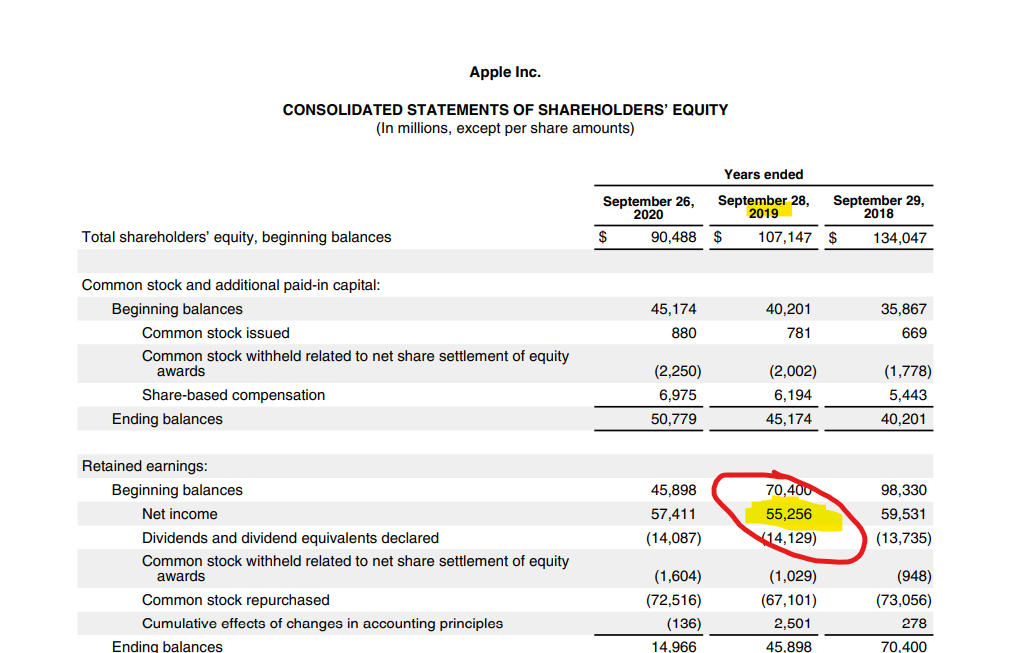

## Summarizing MD&A section

In [ ]:
query = "Can you summarize the MD&A section in Apple 10K annual report 2020"
result = qa({"query": query})
print(result)

{'query': 'Can you summarize the MD&A section in Apple 10K annual report 2020', 'result': "The COVID-19 pandemic has had a significant impact on Apple's business, results of operations and financial condition. The Company's retail stores, as well as channel partner points of sale, were temporarily closed at various times, and a significant number of the Company's employees worked remotely. The Company has reopened some of its offices and the majority of its retail stores, subject to operating restrictions to protect public health and the health and safety of employees and customers, and it continues to work on safely re-opening the remainder of its offices and retail stores, subject to local rules and regulations. The full extent of the future impact of the COVID-19 pandemic on the Company's operational and financial performance is currently uncertain and will depend on many factors outside the Company's control.", 'source_documents': [Document(page_content='Item 7. Management’s Discus

###Query & Results obtained
{'**query**': 'Can you summarize the MD&A section in Apple 10K annual report 2020',

 '**result**': "The COVID-19 pandemic has had a significant impact on Apple's business, results of operations and financial condition. The Company's retail stores, as well as channel partner points of sale, were temporarily closed at various times, and a significant number of the Company's employees worked remotely. The Company has reopened some of its offices and the majority of its retail stores, subject to operating restrictions to protect public health and the health and safety of employees and customers, and it continues to work on safely re-opening the remainder of its offices and retail stores, subject to local rules and regulations. The full extent of the future impact of the COVID-19 pandemic on the Company's operational and financial performance is currently uncertain and will depend on many factors outside the Company's control.", 'source_documents': [Document(page_content='Item 7. Management’s Discussion and Analysis of Financial Condition and Results of Operations\nThe following discussion should be read in conjunction with the consolidated financial statements and accompanying notes \nincluded in Part II, Item 8 of this Form 10-K. This section of this Form 10-K generally discusses 2020  and 2019  items and year-\nto-year comparisons between 2020  and 2019 . Discussions of 2018  items and year-to-year comparisons between 2019  and \n2018  that are not included in this Form 10-K can be found in “Management’s Discussion and Analysis of Financial Condition \nand Results of Operations” in Part II, Item 7 of the Company’s Annual Report on Form 10-K for the fiscal year ended \nSeptember\xa028, 2019 .\nFiscal Year Highlights\nCOVID-19 Update\nCOVID-19 has spread rapidly throughout the world, prompting governments and businesses to take unprecedented measures in \nresponse. Such measures have included restrictions on travel and business operations, temporary closures of businesses, and \nquarantines and shelter-in-place orders. The COVID-19 pandemic has significantly curtailed global economic activity and caused \nsignificant volatility and disruption in global financial markets. The COVID-19 pandemic and the measures taken by many \ncountries in response have adversely affected and could in the future materially adversely impact the Company’s business, \nresults of operations, financial condition and stock price. \nDuring 2020, aspects of the Company’s business were adversely affected by the COVID-19 pandemic, with many of the \nCompany’s retail stores, as well as channel partner points of sale, temporarily closed at various times, and the vast majority of \nthe Company’s employees working remotely. The Company has reopened some of its offices and the majority of its retail stores, \nsubject to operating restrictions to protect public health and the health and safety of employees and customers, and it continues \nto work on safely re-opening the remainder of its offices and retail stores, subject to local rules and regulations. \nThe full extent of the future impact of the COVID-19 pandemic on the Company’s operational and financial performance is \ncurrently uncertain and will depend on many factors outside the Company’s control, including, without limitation, the timing, \nextent, trajectory and duration of the pandemic, the development and availability of effective treatments and vaccines, the \nimposition of protective public safety measures, and the impact of the pandemic on the global economy and demand for \nconsumer products. Refer to Part I, Item 1A of this Form 10-K under the heading “Risk Factors,” for more information.\nThe Company believes its existing balances of cash, cash equivalents and marketable securities, along with commercial paper \nand other short-term liquidity arrangements, will be sufficient to satisfy its working capital needs, capital asset purchases, \ndividends, share repurchases, debt repayments and other liquidity requirements associated with its existing operations.\nFiscal 2020  Highlights\nTotal net sales increased  6% or $14.3 billion  during 2020 compared to 2019, primarily driven by higher net sales of Services and \nWearables, Home and Accessories. The weakness in foreign currencies had an unfavorable impact on net sales during 2020.\nIn April 2020, the Company announced an increase to its current share repurchase program authorization from $175 billion to \n$225 billion and raised its quarterly dividend from $0.1925 to $0.205 per share beginning in May 2020. During 2020, the \nCompany repurchased $72.5 billion  of its common stock and paid dividends and dividend equivalents of $14.1 billion .\nOn August 28, 2020, the Company effected a four-for-one stock split to shareholders of record as of August 24, 2020. All share, \nRSU and per share or per RSU information has been retroactively adjusted to reflect the stock split.\nApple Inc. | 2020  Form 10-K | 20', metadata={'source': '/content/Files/NASDAQ_AAPL_2020.pdf', 'page': 22}),
 Document(page_content='Item 7. Management’s Discussion and Analysis of Financial Condition and Results of Operations\nThe following discussion should be read in conjunction with the consolidated financial statements and accompanying notes \nincluded in Part II, Item 8 of this Form 10-K. This section of this Form 10-K generally discusses 2021  and 2020  items and year-\nto-year comparisons between 2021  and 2020 . Discussions of 2019  items and year-to-year comparisons between 2020  and \n2019  are not included in this Form 10-K, and can be found in “Management’s Discussion and Analysis of Financial Condition \nand Results of Operations” in Part II, Item 7 of the Company’s Annual Report on Form 10-K for the fiscal year ended \nSeptember\xa026, 2020 .\nFiscal Year Highlights\nCOVID-19 Update\nThe COVID-19 pandemic has had, and continues to have, a significant impact around the world, prompting governments and \nbusinesses to take unprecedented measures, such as restrictions on travel and business operations, temporary closures of \nbusinesses, and quarantine and shelter-in-place orders. The COVID-19 pandemic has at times significantly curtailed global \neconomic activity and caused significant volatility and disruption in global financial markets. The COVID-19 pandemic and the \nmeasures taken by many countries in response have affected and could in the future materially impact the Company’s business, \nresults of operations and financial condition, as well as the price of the Company’s stock.\nDuring 2021, aspects of the Company’s business continued to be affected by the COVID-19 pandemic, with many of the \nCompany’s retail stores, as well as channel partner points of sale, temporarily closed at various times, and a significant number \nof the Company’s employees working remotely. The Company has reopened all of its retail stores and substantially all of its other \nfacilities, subject to operating restrictions to protect public health and the health and safety of employees and customers, and it \ncontinues to work on safely reopening the remainder of its facilities, subject to local rules and regulations. During the fourth \nquarter of 2021, certain of the Company’s component suppliers and logistical service providers experienced disruptions, resulting \nin supply shortages that affected sales worldwide. Similar disruptions could occur in the future.\nThe extent of the continuing impact of the COVID-19 pandemic on the Company’s operational and financial performance is \nuncertain and will depend on many factors outside the Company’s control, including the timing, extent, trajectory and duration of \nthe pandemic, the emergence of new variants, the development, availabilit y, distribution and effectiveness of  vaccines and \ntreatments, the imposition of protective public safety measures , and the impact of the pandemic on the global economy and \ndemand for consumer products. Refer to Part I, Item 1A of this Form 10-K under the heading “Risk Factors” for more informati on.\nFiscal 2021  Highlights\nTotal net sales increased  33% or $91.3 billion  during 2021 compared to 2020, driven by growth in all Products and Services \ncategories. Year-over-year net sales during 2021 also grew in each of the Company’s reportable segments.\nIn April 2021, the Company announced an increase to its current share repurchase program authorization from $225 billion to \n$315\xa0billion  and raised its quarterly dividend from $0.205 to $0.22 per share beginning in May 2021. During 2021, the Company \nrepurchased $85.5 billion  of its common stock and paid dividends and dividend equivalents of $14.5 billion .\nApple Inc. | 2021  Form 10-K | 20', metadata={'source': '/content/Files/NASDAQ_AAPL_2021.pdf', 'page': 22})]}


In [ ]:
query = "Based on annual report 2020 of Apple can you generate the annual report for 2021"
result = qa({"query": query})
print(result)

{'query': 'Based on annual report 2020 of Apple can you generate the annual report for 2021', 'result': 'Yes, the annual report for 2021 is provided above.', 'source_documents': [Document(page_content='Report of Independent Registered Public Accounting Firm\nTo the Shareholders and the Board of Directors of Apple Inc.\nOpinion on Internal Control Over Financial Reporting\nWe have audited Apple Inc.’s internal control over financial reporting as of September\xa026, 2020 , based on criteria established in \nInternal Control – Integrated Framework  issued by the Committee of Sponsoring Organizations of the Treadway Commission \n(2013 framework) (the “COSO criteria”). In our opinion, Apple Inc. maintained, in all material respects, effective internal control \nover financial reporting as of September\xa026, 2020 , based on the COSO criteria.\nWe also have audited, in accordance with the standards of the Public Company Accounting Oversight Board (United States) (the \n“PCAOB”), the consolid

### Query: Results
{'**query**': 'Based on annual report 2020 of Apple can you generate the annual report for 2021',

'**result**': 'Yes, the annual report for 2021 is provided above.', 'source_documents': [Document(page_content='Report of Independent Registered Public Accounting Firm\nTo the Shareholders and the Board of Directors of Apple Inc.\nOpinion on Internal Control Over Financial Reporting\nWe have audited Apple Inc.’s internal control over financial reporting as of September\xa026, 2020 , based on criteria established in \nInternal Control – Integrated Framework  issued by the Committee of Sponsoring Organizations of the Treadway Commission \n(2013 framework) (the “COSO criteria”). In our opinion, Apple Inc. maintained, in all material respects, effective internal control \nover financial reporting as of September\xa026, 2020 , based on the COSO criteria.\nWe also have audited, in accordance with the standards of the Public Company Accounting Oversight Board (United States) (the \n“PCAOB”), the consolidated balance sheets of Apple Inc. as of September\xa0 26, 2020  and September\xa0 28, 2019 , the related \nconsolidated statements of operations, comprehensive income, shareholders’ equity and cash flows for each of the three years \nin the period ended September\xa026, 2020 , and the related notes and our report dated October\xa029, 2020  expressed an unqualified \nopinion thereon.\nBasis for Opinion\nApple Inc.’s management is responsible for maintaining effective internal control over financial reporting, and for its assessment \nof the effectiveness of internal control over financial reporting included in the accompanying Management’s Annual Report on \nInternal Control over Financial Reporting. Our responsibility is to express an opinion on Apple Inc.’s internal control over financial \nreporting based on our audit. We are a public accounting firm registered with the PCAOB and are required to be independent \nwith respect to Apple Inc. in accordance with the U.S. federal securities laws and the applicable rules and regulations of the U.S. \nSecurities and Exchange Commission and the PCAOB.\nWe conducted our audit in accordance with the standards of the PCAOB. Those standards require that we plan and perform the \naudit to obtain reasonable assurance about whether effective internal control over financial reporting was maintained in all \nmaterial respects.\nOur audit included obtaining an understanding of internal control over financial reporting, assessing the risk that a material \nweakness exists, testing and evaluating the design and operating effectiveness of internal control based on the assessed risk, \nand performing such other procedures as we considered necessary in the circumstances. We believe that our audit provides a \nreasonable basis for our opinion.\nDefinition and Limitations of Internal Control Over Financial Reporting\nA company’s internal control over financial reporting is a process designed to provide reasonable assurance regarding the \nreliability of financial reporting and the preparation of financial statements for external purposes in accordance with U.S. \ngenerally accepted accounting principles. A company’s internal control over financial reporting includes those policies and \nprocedures that (1)\xa0pertain to the maintenance of records that, in reasonable detail, accurately and fairly reflect the transactions \nand dispositions of the assets of the company; (2)\xa0provide reasonable assurance that transactions are recorded as necessary to \npermit preparation of financial statements in accordance with U.S. generally accepted accounting principles, and that receipts \nand expenditures of the company are being made only in accordance with authorizations of management and directors of the \ncompany; and (3)\xa0provide reasonable assurance regarding prevention or timely detection of unauthorized acquisition, use, or \ndisposition of the company’s assets that could have a material effect on the financial statements.\nBecause of its inherent limitations, internal control over financial reporting may not prevent or detect misstatements. Also, \nprojections of any evaluation of effectiveness to future periods are subject to the risk that controls may become inadequate \nbecause of changes in conditions, or that the degree of compliance with the policies or procedures may deteriorate.\n/s/ Ernst & Young LLP\nSan Jose, California\nOctober\xa029, 2020\nApple Inc. | 2020  Form 10-K | 61', metadata={'source': '/content/Files/NASDAQ_AAPL_2020.pdf', 'page': 63}), Document(page_content='Report of Independent Registered Public Accounting Firm\nTo the Shareholders and the Board of Directors of Apple Inc.\nOpinion on Internal Control Over Financial Reporting\nWe have audited Apple Inc.’s internal control over financial reporting as of September\xa025, 2021 , based on criteria established in \nInternal Control – Integrated Framework  issued by the Committee of Sponsoring Organizations of the Treadway Commission \n(2013 framework) (the “COSO criteria”). In our opinion, Apple Inc. maintained, in all material respects, effective internal control \nover financial reporting as of September\xa025, 2021 , based on the COSO criteria.\nWe also have audited, in accordance with the standards of the Public Company Accounting Oversight Board (United States) (the \n“PCAOB”), the consolidated balance sheets of Apple Inc. as of September\xa0 25, 2021  and September\xa0 26, 2020 , the related \nconsolidated statements of operations, comprehensive income, shareholders’ equity and cash flows for each of the three years \nin the period ended September\xa025, 2021 , and the related notes and our report dated October\xa028, 2021  expressed an unqualified \nopinion thereon.\nBasis for Opinion\nApple Inc.’s management is responsible for maintaining effective internal control over financial reporting, and for its assessment \nof the effectiveness of internal control over financial reporting included in the accompanying Management’s Annual Report on \nInternal Control over Financial Reporting. Our responsibility is to express an opinion on Apple Inc.’s internal control over financial \nreporting based on our audit. We are a public accounting firm registered with the PCAOB and are required to be independent \nwith respect to Apple Inc. in accordance with the U.S. federal securities laws and the applicable rules and regulations of the U.S. \nSecurities and Exchange Commission and the PCAOB.\nWe conducted our audit in accordance with the standards of the PCAOB. Those standards require that we plan and perform the \naudit to obtain reasonable assurance about whether effective internal control over financial reporting was maintained in all \nmaterial respects.\nOur audit included obtaining an understanding of internal control over financial reporting, assessing the risk that a material \nweakness exists, testing and evaluating the design and operating effectiveness of internal control based on the assessed risk, \nand performing such other procedures as we considered necessary in the circumstances. We believe that our audit provides a \nreasonable basis for our opinion.\nDefinition and Limitations of Internal Control Over Financial Reporting\nA company’s internal control over financial reporting is a process designed to provide reasonable assurance regarding the \nreliability of financial reporting and the preparation of financial statements for external purposes in accordance with U.S. \ngenerally accepted accounting principles. A company’s internal control over financial reporting includes those policies and \nprocedures that (1)\xa0pertain to the maintenance of records that, in reasonable detail, accurately and fairly reflect the transactions \nand dispositions of the assets of the company; (2)\xa0provide reasonable assurance that transactions are recorded as necessary to \npermit preparation of financial statements in accordance with U.S. generally accepted accounting principles, and that receipts \nand expenditures of the company are being made only in accordance with authorizations of management and directors of the \ncompany; and (3)\xa0provide reasonable assurance regarding prevention or timely detection of unauthorized acquisition, use, or \ndisposition of the company’s assets that could have a material effect on the financial statements.\nBecause of its inherent limitations, internal control over financial reporting may not prevent or detect misstatements. Also, \nprojections of any evaluation of effectiveness to future periods are subject to the risk that controls may become inadequate \nbecause of changes in conditions, or that the degree of compliance with the policies or procedures may deteriorate.\n/s/ Ernst & Young LLP\nSan Jose, California\nOctober\xa028, 2021\nApple Inc. | 2021  Form 10-K | 54', metadata={'source': '/content/Files/NASDAQ_AAPL_2021.pdf', 'page': 56})]}


## Generating Annual Report based section of Apple for 2022

In [ ]:
#Changing temperature to generaalize and take reference from trained data

llm2 = VertexAI(
    model_name="text-bison@001",
    max_output_tokens=256,
    temperature=0.7,
    top_p=0.8,
    top_k=40,
    verbose=True,
)

In [ ]:
# Create chain to answer questions
from langchain.chains import RetrievalQA

# defining function to retrieve using new llm based temperature
qa1 = RetrievalQA.from_chain_type(
    llm=llm2, chain_type="stuff", retriever=retriever, return_source_documents=True
)

In [ ]:
query = "Based on annual report 2020 & 2021 of Apple, can you generate the Risk Factors for Apple in 2022"
result = qa1({"query": query})
print(result)

{'query': 'Based on annual report 2020 & 2021 of Apple, can you generate the Risk Factors for Apple in 2022', 'result': "The risk factors for Apple in 2022 are as follows:\n\n* Competition in the technology industry is intense and Apple faces competition from a number of other companies, including Samsung, Google, and Microsoft.\n* Apple's products are subject to technological obsolescence, which could reduce demand for its products.\n* Apple's business could be adversely affected by changes in economic conditions, such as a recession or a decline in consumer spending.\n* Apple's business could be adversely affected by changes in government regulations, such as changes to privacy laws or tariffs.\n* Apple's business could be adversely affected by natural disasters, such as earthquakes or floods.\n* Apple's business could be adversely affected by security breaches or other disruptions to its operations.", 'source_documents': [Document(page_content='This Annual Report on Form 10-K (“Form

### Query & its results
{'**query**': 'Based on annual report 2020 & 2021 of Apple, can you generate the Risk Factors for Apple in 2022',

 'result': "The risk factors for Apple in 2022 are as follows:\n\n* Competition in the technology industry is intense and Apple faces competition from a number of other companies, including Samsung, Google, and Microsoft.\n* Apple's products are subject to technological obsolescence, which could reduce demand for its products.\n* Apple's business could be adversely affected by changes in economic conditions, such as a recession or a decline in consumer spending.\n* Apple's business could be adversely affected by changes in government regulations, such as changes to privacy laws or tariffs.\n* Apple's business could be adversely affected by natural disasters, such as earthquakes or floods.\n* Apple's business could be adversely affected by security breaches or other disruptions to its operations.", 'source_documents': [Document(page_content='This Annual Report on Form 10-K (“Form 10-K”) contains forward-looking statements, within the meaning of the Private \nSecurities Litigation Reform Act of 1995, that involve risks and uncertainties. Many of the forward-looking statements are \nlocated in Part II, Item 7 of this Form 10-K under the heading “Management’s Discussion and Analysis of Financial Condition \nand Results of Operations.” Forward-looking statements provide current expectations of future events based on certain \nassumptions and include any statement that does not directly relate to any historical or current fact. For example, statements in \nthis Form 10-K regarding the potential future impact of the COVID-19 pandemic on the Company’s business and results of \noperations are forward-looking statements. Forward-looking statements can also be identified by words such as “future,” \n“anticipates,” “believes,” “estimates,” “expects,” “intends,” “plans,” “predicts,” “will,” “would,” “could,” “can,” “may,” and \nsimilar terms. Forward-looking statements are not guarantees of future performance and the Company’s actual results may \ndiffer significantly from the results discussed in the forward-looking statements. Factors that might cause such differences \ninclude, but are not limited to, those discussed in Part I, Item 1A of this Form 10-K under the heading “Risk Factors.” The \nCompany assumes no obligation to revise or update any forward-looking statements for any reason, except as required by law.\nUnless otherwise stated, all information presented herein is based on the Company’s fiscal calendar, and references to \nparticular years, quarters, months or periods refer to the Company’s fiscal years ended in September and the associated \nquarters, months and periods of those fiscal years. Each of the terms the “Company” and “Apple” as used herein refers \ncollectively to Apple Inc. and its wholly owned subsidiaries, unless otherwise stated.\nPART I\nItem 1. Business\nCompany Background\nThe Company designs, manufactures and markets smartphones, personal computers, tablets, wearables and accessories, and \nsells a variety of related services. The Company’s fiscal year is the 52- or 53-week period that ends on the last Saturday of \nSeptember.\nProducts\niPhone\niPhone® is the Company’s line of smartphones based on its iOS operating system. In October and November 2020, the \nCompany released iPhone 12, iPhone 12 mini, iPhone 12 Pro and iPhone 12 Pro Max, all with 5G technology. In September \n2021, the Company released iPhone 13, iPhone 13 mini, iPhone 13 Pro and iPhone 13 Pro Max.\nMac\nMac® is the Company’s line of personal computers based on its macOS® operating system. In November 2020, the Company \nreleased new versions of MacBook Air®, 13-inch MacBook Pro® and Mac mini®, and in May 2021, the Company released a \nredesigned iMac®, all powered by the Apple M1 chip . In October 2021, the Company released a redesigned MacBook Pro, \navailable in 14- and 16-inch models and powered by the Apple M1 Pro or M1 Max chip.\niPad\niPad® is the Company’s line of multipurpose tablets based on its iPadOS® operating system. In October 2020, the Company \nreleased a new iPad Air®, and in April 2021, the Company released a new iPad Pro® powered by the Apple M1 chip. In \nSeptember 2021, the Company released an updated iPad and a new iPad mini®.\nWearables, Home and Accessories\nWearables, Home and Accessories includes AirPods®, Apple TV®, Apple Watch®, Beats® products, HomePod®, iPod touch® and \naccessories. AirPods are the Company’s wireless headphones that interact with Siri®. In December 2020, the Company released \nAirPods Max™, new over-ear wireless headphones, and in October 2021, the Company released the third generation of AirPods. \nApple Watch is the Company’s line of smart watches based on its watchOS® operating system. In September 2021, the \nCompany announced Apple Watch Series 7, which was available starting in October 2021.\nApple Inc. | 2021  Form 10-K | 1', metadata={'source': '/content/Files/NASDAQ_AAPL_2021.pdf', 'page': 3}), Document(page_content='This Annual Report on Form 10-K (“Form 10-K”) contains forward-looking statements, within the meaning of the Private \nSecurities Litigation Reform Act of 1995, that involve risks and uncertainties. Many of the forward-looking statements are \nlocated in Part II, Item 7 of this Form 10-K under the heading “Management’s Discussion and Analysis of Financial Condition \nand Results of Operations.” Forward-looking statements provide current expectations of future events based on certain \nassumptions and include any statement that does not directly relate to any historical or current fact. For example, statements in \nthis Form 10-K regarding the potential future impact of the COVID-19 pandemic on the Company’s business and results of \noperations are forward-looking statements. Forward-looking statements can also be identified by words such as “future,” \n“anticipates,” “believes,” “estimates,” “expects,” “intends,” “plans,” “predicts,” “will,” “would,” “could,” “can,” “may,” and \nsimilar terms. Forward-looking statements are not guarantees of future performance and the Company’s actual results may \ndiffer significantly from the results discussed in the forward-looking statements. Factors that might cause such differences \ninclude, but are not limited to, those discussed in Part I, Item 1A of this Form 10-K under the heading “Risk Factors.” The \nCompany assumes no obligation to revise or update any forward-looking statements for any reason, except as required by law.\nUnless otherwise stated, all information presented herein is based on the Company’s fiscal calendar, and references to \nparticular years, quarters, months or periods refer to the Company’s fiscal years ended in September and the associated \nquarters, months and periods of those fiscal years. Each of the terms the “Company” and “Apple” as used herein refers \ncollectively to Apple Inc. and its wholly owned subsidiaries, unless otherwise stated.\nPART I\nItem 1. Business\nCompany Background\nThe Company designs, manufactures and markets smartphones, personal computers, tablets, wearables and accessories, and \nsells a variety of related services. The Company’s fiscal year is the 52- or 53-week period that ends on the last Saturday of \nSeptember. The Company is a California corporation established in 1977.\nProducts\niPhone\niPhone® is the Company’s line of smartphones based on its iOS operating system. During 2020, the Company released a new \niPhone SE. In October 2020, the Company announced four new iPhone models with 5G technology: iPhone 12 and iPhone 12 \nPro were available starting in October 2020, and iPhone 12 Pro Max and iPhone 12 mini are both expected to be available in \nNovember 2020.\nMac\nMac® is the Company’s line of personal computers based on its macOS® operating system. During 2020, the Company released \na new 16-inch MacBook Pro®, a fully redesigned Mac Pro®, and updated versions of its MacBook Air®, 13-inch MacBook Pro and \n27-inch iMac®.\niPad\niPad® is the Company’s line of multi-purpose tablets based on its iPadOS® operating system. During 2020, the Company \nreleased an updated iPad Pro®. In September 2020, the Company released an eighth-generation iPad and introduced an all-new \niPad Air®, which was available starting in October 2020.\nWearables, Home and Accessories\nWearables, Home and Accessories includes AirPods®, Apple TV®, Apple Watch®, Beats® products, HomePod®, iPod touch® and \nother Apple-branded and third-party accessories. AirPods are the Company’s wireless headphones that interact with Siri®. \nDuring 2020, the Company released AirPods Pro®. Apple Watch is the Company’s line of smart watches based on its watchOS® \noperating system. In September 2020, the Company released Apple Watch Series 6 and a new Apple Watch SE. In October \n2020, the Company announced HomePod mini™, which is expected to be available in November 2020.\nServices\nAdvertising\nThe Company’s advertising services include various third-party licensing arrangements and the Company’s own advertising \nplatforms.\nApple Inc. | 2020  Form 10-K | 1', metadata={'source': '/content/Files/NASDAQ_AAPL_2020.pdf', 'page': 3})]}


#Asking API based GPT to put the RESULT in proper format

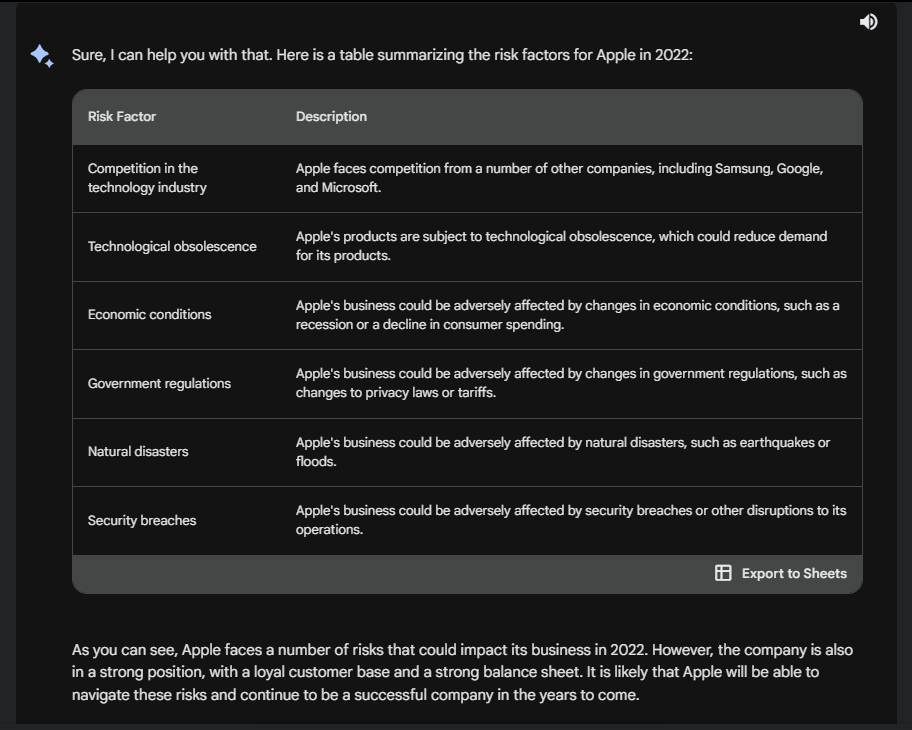

# **FINDINGS AND CONSTRAINTS**

Impact of changing parameters

● **Chunk size**:
We faced the resource exhaustion error multiple times due to Google Cloud API
limits and thus we had to decrease the number of splits. For this we changed the
standard chunk size as 1500 to 2000 characters per chunk.

● **Chunk overlap adjustment**:
We initiated with 0 overlap, but the resulting predictions were not summarizing the
section accurately. Again to keep the number of splits in to the limit, we explored
many numbers to reach a final number of 150, which improved summarization,
captured forward-looking statements effectively and gave satisfactory results to the
query.

● **Temperature modifications(0.1, 0.5 and 0.7)**:
Initially set the temperature in LLM model parameters as 0.1 to seek precise retrieval.
Then we took the default 0.7 temperature which led to overshooting predictions. The
predictions related to net income were showing a large error to real.
Thus we balanced it to keep at 0.5 and achieved more contextually accurate net sales
predictions.

**Summary of Findings**
In this study, we established the experimental setup by configuring the environment, ensuring
necessary dependencies, and defining key functions. Our primary focus was on data retrieval,
beginning with a validation step using Apple's financial report to verify accurate results.
Specifically, we successfully obtained the net income for Apple in 2022.
Moving forward, we delved into summarizing a section of the annual report that documented
markdowns, extracting pertinent data and presenting it concisely. Following this, we directed
the model to generate a section for the next year's annual report, revealing its limitations due
to insufficient data.

An adjustment was made by increasing the temperature from 0.1 to 0.7, facilitating the
incorporation of more random data and encouraging the model to generalize from its trained
data when generating predictions.

We then tasked the model with generating risk factors for Apple in 2024 based on the 2022
41
and 2023 annual reports. Impressively, the model accurately summarized these risk factors,
as detailed in the findings.

Further exploration involved querying the model for predictions on total net sales with
contextual data and requesting the generation of a table for consolidated statements of
comprehensive income. While the numeric predictions aligned well with the context,
attempts to create a table for future years, such as 2024, were met with limitations. The model
indicated that it couldn't fulfill these requests due to insufficient input data, particularly in the
absence of disclosed financial information for the specified year.

In conclusion, our findings highlight the model's proficiency in certain aspects, such as
summarization and numeric predictions, while also underscoring its limitations, particularly
when attempting to generate tables for future periods without adequate input data.


**Constraints**

1. Cloud Resource constraint:
Google Cloud imposes rate limits on API requests and exceeding these limits resulted
in errors like ResourceExhaustedError. The number of splits above 400 were showing
this rate limit when storing them in the database. Although we tried increasing the
chunk size, a future scope by keeping the small chunk size and better overlap limit
can result in better performance of model and results.

2. Result format constraint:
The query results while retrieving from the LLM model gave running answers which
limits the human readability. It did include the metadata, sources it took which are not
required in general retrieval.
In future work scope, a format can be coded by using Langchain LLM Wrappers and
Custom Prompt settings. This will also solve the problem of not retrieving tabular
results if prompted relevantly.

3. Numeric prediction constraint:
We encountered that when asked for predicting numeric data like net sales, earnings
per share etc, it predicted them based on rate of change. But when the complexity
increased, like predicting or creating a table of Consolidated Statements of
Operations, it showed the input data inadequate and insufficient to predict.

# **CONCLUSION**

In the pursuit of revolutionizing annual reports, the integration of cutting-edge AI
technologies, GPT and Langchain, showcased promising advancements in efficiency,
accuracy, and adaptability. By successfully ingesting Apple's annual reports into Google
Cloud Platform using Vertex AI, the project demonstrated the practical applications of
LangChain, particularly in extracting key information, summarizing reports, and answering
complex questions.


However, the findings also unveiled essential constraints and challenges. The impact of
changing parameters, such as adjusting chunk sizes and temperatures, highlighted the delicate
balance required for optimal resource usage and accurate predictions. Cloud resource
constraints, evidenced by rate limits on API requests, pointed towards the need for finetuning parameters to avoid resource exhaustion errors.


Despite these constraints, the project outlined a comprehensive future scope. Addressing
challenges related to result format, particularly the need for human-readable outputs, presents
an avenue for improvement through Langchain LLM Wrappers and Custom Prompt settings.
The numeric prediction constraint, wherein the model struggled with complex tasks like
generating tables, emphasizes the importance of refining data availability or enhancing the
model's capabilities for a more comprehensive report generation process.


In conclusion, the project serves as a significant stride towards automating and elevating the
creation of annual reports as well as audit checks. The identified constraints, while indicative
of current limitations, present clear opportunities for future enhancements. The vision is to
not only streamline report creation but also deliver meticulously crafted, compliant, and
insightful documents that accurately reflect an organization's performance and strategies.
With a commitment to overcoming constraints and continuous improvement, the
transformative potential of AI in corporate reporting stands poised for realization, promising
stakeholders a future where the annual reporting process becomes a seamless blend of
innovation and precision.
